# Algorithmic Trading Strategy Challenge

Name: Vidhur Busannagari

Grade: Freshman

Date: March 1, 2024

Used GPT for commenting code, getting information about finance terminology, for documentaiton, and for some code

In this challenge, your task is to design an algorithmic trading strategy using the stocks provided to you in the assignment.
    
You may use yfinance to source data for the stocks within the period defined in the assignment

You are not allowed to use a "buy and hold" strategy.

Your solution can be based on machine learning, technical analysis, or any other approach you find suitable.

Be creative and demonstrate your coding ability in this challenge.

In addition to implementing your strategy during this time period, you will also need to graph the profit/loss of strategy and the buy and hold over time.

Make sure to add markdown blocks and comments to expain your strategy


## Strategy Implementation

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Optimal Portfolio Allocation:
TSLA: 26360.85 USD
AAPL: 3934.97 USD
KO: 2644.08 USD
F: 5155.88 USD
PEP: 6176.67 USD
JNJ: 6819.31 USD
PFE: 48908.24 USD


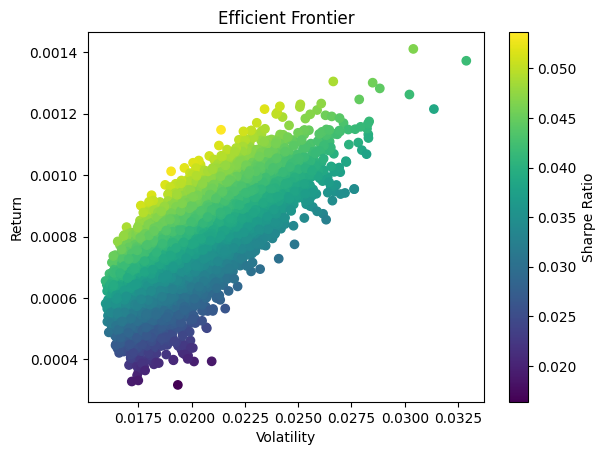

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display_html
from IPython.display import display

# Initialize variables
initial_capital = 100000  # Starting capital for the portfolio
tickers = ['TSLA', 'AAPL', 'KO', 'F', 'PEP', 'JNJ', 'PFE']  # List of stock tickers to consider
risk_free_rate = 0.00  # Assume a risk-free rate of 0%
lookback_period = 252  # Number of trading days in a year
num_portfolios = 10000  # Number of portfolios to simulate

def train_model(ticker):
    """
    Fetches historical data for a given ticker and trains a Random Forest Classifier model.

    Args:
        ticker (str): The stock ticker symbol.

    Returns:
        model: Trained Random Forest Classifier model.
    """
    # Download historical stock data from Yahoo Finance
    data = yf.download(ticker, start="2010-01-01", end="2022-01-01")
    
    # Prepare the input features (X) and target variable (y)
    X = data[["Open", "High", "Low", "Close", "Volume"]]
    y = (data["Close"] > data["Open"]).astype(int)
    
    # Split the data into training and testing sets
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Random Forest Classifier model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    return model

def backtest_strategy(model, ticker, capital):
    """
    Backtests the trading strategy using the trained model and historical data.

    Args:
        model: Trained Random Forest Classifier model.
        ticker (str): The stock ticker symbol.
        capital (float): Initial capital for the backtest.

    Returns:
        data (DataFrame): DataFrame containing the backtest results.
    """
    # Download historical stock data for the backtest period
    data = yf.download(ticker, start="2022-01-01", end="2024-12-31")
    
    # Prepare the input features (X)
    X = data[["Open", "High", "Low", "Close", "Volume"]]
    
    # Make predictions using the trained model
    predictions = model.predict(X)
    
    # Add the predictions to the DataFrame
    data['Predictions'] = predictions
    
    # Calculate the position changes based on the predictions
    data['Positions'] = data['Predictions'].diff()
    
    # Initialize the capital, holdings, cash, and total columns
    data['Capital'] = capital
    data['Holdings'] = data['Capital'] / data['Open']
    initial_holdings = data['Holdings'].iloc[0]
    data['Cash'] = capital - (initial_holdings * data['Open'])
    data['Total'] = (data['Holdings'] * data['Close']) + data['Cash']
    
    # Calculate the returns
    data['Returns'] = data['Total'].pct_change()
    
    return data

# Train models and backtest strategy for each ticker
models = {}
backtests = {}
for ticker in tickers:
    models[ticker] = train_model(ticker)
    backtests[ticker] = backtest_strategy(models[ticker], ticker, initial_capital / len(tickers))

def portfolio_metrics(weights, mean_returns, cov_matrix):
    """
    Calculates portfolio metrics (returns, standard deviation, and Sharpe ratio) given the weights, mean returns, and covariance matrix.

    Args:
        weights (numpy.array): Array of portfolio weights.
        mean_returns (numpy.array): Array of mean returns for each asset.
        cov_matrix (numpy.array): Covariance matrix of asset returns.

    Returns:
        tuple: Portfolio returns, standard deviation, and Sharpe ratio.
    """
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (returns - risk_free_rate) / std_dev
    return returns, std_dev, sharpe_ratio

def generate_random_portfolios(mean_returns, cov_matrix, num_portfolios):
    """
    Generates random portfolios and calculates their metrics.

    Args:
        mean_returns (numpy.array): Array of mean returns for each asset.
        cov_matrix (numpy.array): Covariance matrix of asset returns.
        num_portfolios (int): Number of random portfolios to generate.

    Returns:
        tuple: Array of portfolio metrics (returns, standard deviation, Sharpe ratio) and list of portfolio weights.
    """
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return, portfolio_std_dev, portfolio_sharpe = portfolio_metrics(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = portfolio_sharpe
    return results, weights_record

# Calculate mean returns and covariance matrix
portfolio_returns = pd.DataFrame({ticker: backtests[ticker]['Returns'] for ticker in tickers})
mean_returns = portfolio_returns.mean()
cov_matrix = portfolio_returns.cov()

# Generate random portfolios
results, weights_record = generate_random_portfolios(mean_returns, cov_matrix, num_portfolios)

# Find portfolio with maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
optimal_weights = weights_record[max_sharpe_idx]

# Allocate capital based on optimal weights
portfolio_allocation = {}
for i, ticker in enumerate(tickers):
    capital_allocation = optimal_weights[i] * initial_capital
    portfolio_allocation[ticker] = capital_allocation

print("Optimal Portfolio Allocation:")
for ticker, allocation in portfolio_allocation.items():
    print(f"{ticker}: {allocation:.2f} USD")

# Plot efficient frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

## Plot (P/L) and (Buy and Hold)

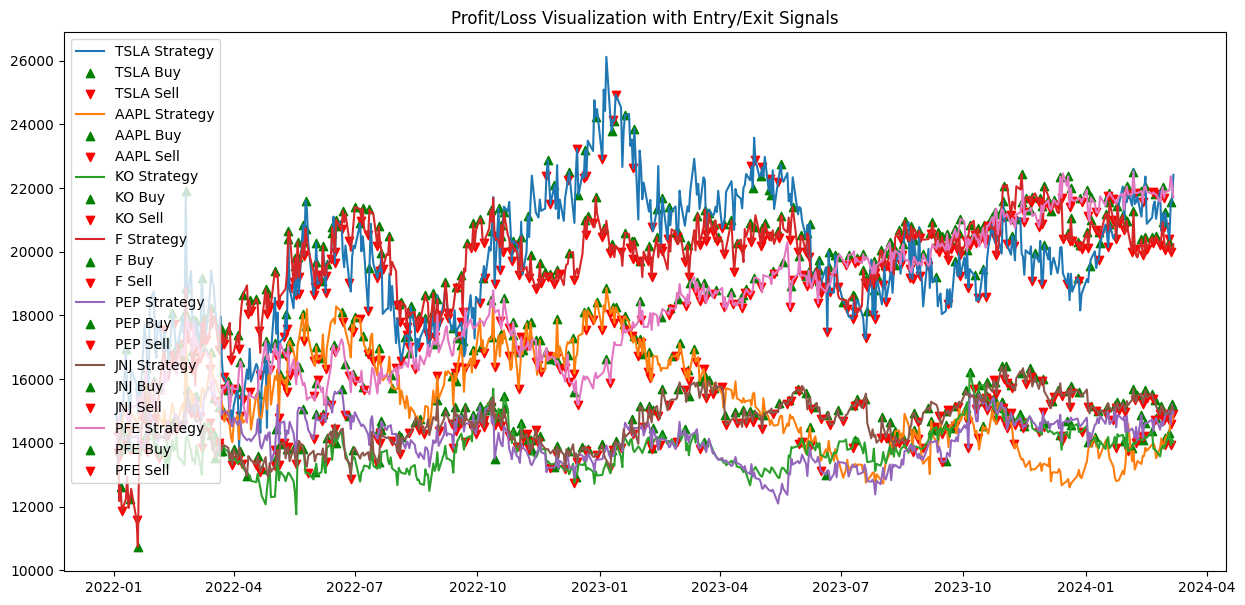

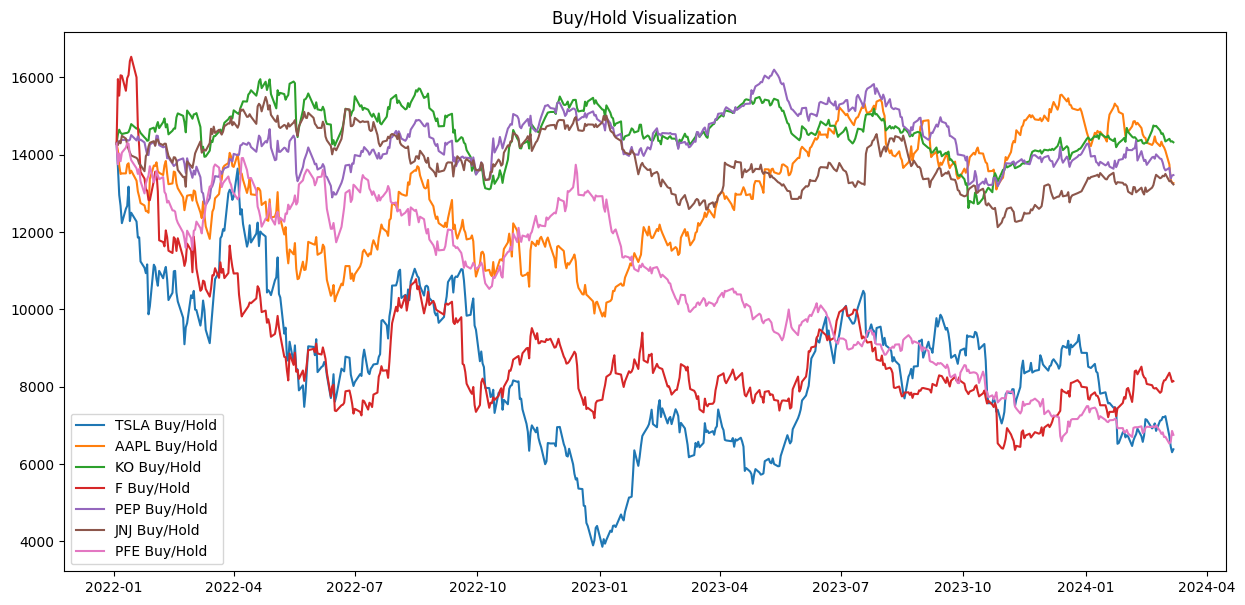

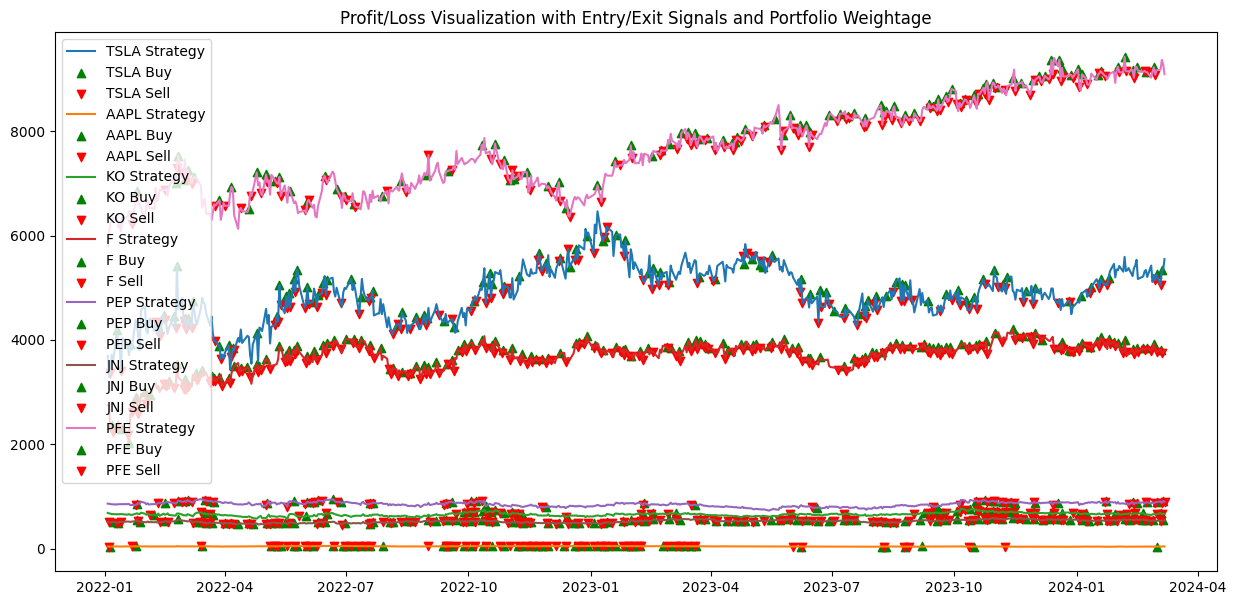

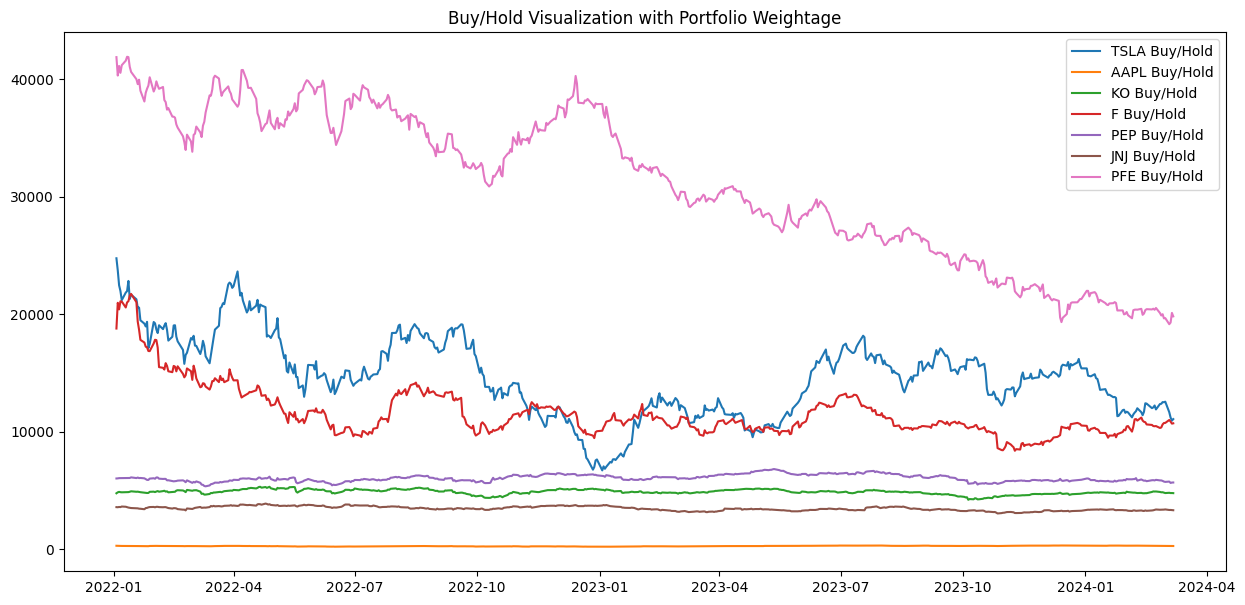

Trades for TSLA:


Date,Buy Price
2022-01-10,333.333344
2022-01-20,336.576660
2022-02-10,302.790009
2022-02-14,287.190002
2022-02-22,278.043335
2022-02-24,233.463333
2022-03-02,290.709991
2022-03-04,283.033325
2022-03-08,265.176666
2022-03-28,355.033325




Trades for AAPL:


Date,Buy Price
2022-01-05,179.610001
2022-01-24,160.020004
2022-03-15,150.899994
2022-05-06,156.009995
2022-05-10,155.520004
2022-05-13,144.589996
2022-05-23,137.789993
2022-05-25,138.429993
2022-06-02,147.830002
2022-06-06,147.029999




Trades for KO:


Date,Buy Price
2022-02-07,61.380001
2022-03-17,59.459999
2022-03-23,60.750000
2022-06-01,63.419998
2022-06-17,59.700001
2022-09-28,56.660000
2022-10-03,56.360001
2022-10-05,56.500000
2022-10-12,55.230000
2022-10-18,56.310001




Trades for F:


Date,Buy Price
2022-01-06,24.090000
2022-01-13,24.639999
2022-01-19,24.650000
2022-01-24,19.930000
2022-01-31,19.580000
2022-02-04,18.520000
2022-02-15,17.799999
2022-02-18,17.600000
2022-02-24,15.990000
2022-03-02,17.500000




Trades for PEP:


Date,Buy Price
2022-01-25,172.080002
2022-02-15,167.220001
2022-02-25,164.419998
2022-03-02,162.979996
2022-03-04,162.000000
2022-03-17,159.830002
2022-03-21,162.270004
2022-03-24,164.059998
2022-05-03,169.139999
2022-05-23,164.210007




Trades for JNJ:


Date,Buy Price
2022-01-07,171.460007
2022-01-11,172.990005
2022-01-25,162.360001
2022-01-27,169.389999
2022-02-15,166.130005
2022-02-25,160.000000
2022-03-10,168.559998
2022-03-15,173.330002
2022-03-18,177.000000
2022-03-22,175.830002




Trades for PFE:


Date,Buy Price
2022-01-25,51.360001
2022-02-23,47.590000
2022-02-25,45.810001
2022-03-01,46.689999
2022-03-04,47.500000
2022-03-09,48.130001
2022-03-28,52.529999
2022-04-06,51.160000
2022-04-19,51.660000
2022-04-25,47.849998


In [2]:
# Plot Profit/Loss Visualization for each stock
plt.figure(figsize=(15, 7))
for ticker in tickers:
    plt.plot(backtests[ticker].index, backtests[ticker]['Total'], label=f'{ticker} Strategy')

    # Mark the trades on the plot
    buys = backtests[ticker][backtests[ticker]['Positions'] == 1]
    sells = backtests[ticker][backtests[ticker]['Positions'] == -1]
    
    plt.scatter(buys.index, backtests[ticker]['Total'][buys.index], label=f'{ticker} Buy', c='g', marker='^')
    plt.scatter(sells.index, backtests[ticker]['Total'][sells.index], label=f'{ticker} Sell', c='r', marker='v')

plt.title("Profit/Loss Visualization with Entry/Exit Signals")
plt.legend()
plt.show()

# Plot Buy/Hold Visualization
plt.figure(figsize=(15, 7))
for ticker in tickers:
    plt.plot(backtests[ticker].index, initial_capital / len(tickers) / backtests[ticker]['Close'].iloc[0] * backtests[ticker]['Close'], label=f'{ticker} Buy/Hold')

plt.title("Buy/Hold Visualization")
plt.legend()
plt.show()

# Plot Profit/Loss Visualization for each stock with portfolio weightage
plt.figure(figsize=(15, 7))
for ticker in tickers:
    # Calculate the weighted initial capital for the ticker
    weighted_initial_capital = portfolio_allocation[ticker]
    # Calculate the weighted total value for the ticker
    weighted_total = weighted_initial_capital / initial_capital * backtests[ticker]['Total']
    
    plt.plot(backtests[ticker].index, weighted_total, label=f'{ticker} Strategy')

    # Mark the trades on the plot
    buys = backtests[ticker][backtests[ticker]['Positions'] == 1]
    sells = backtests[ticker][backtests[ticker]['Positions'] == -1]
    
    plt.scatter(buys.index, weighted_initial_capital / initial_capital * backtests[ticker]['Total'][buys.index], label=f'{ticker} Buy', c='g', marker='^')
    plt.scatter(sells.index, weighted_initial_capital / initial_capital * backtests[ticker]['Total'][sells.index], label=f'{ticker} Sell', c='r', marker='v')

plt.title("Profit/Loss Visualization with Entry/Exit Signals and Portfolio Weightage")
plt.legend()
plt.show()

# Combined Buy/Hold Visualization with portfolio weightage
plt.figure(figsize=(15, 7))
for ticker in tickers:
    weighted_initial_capital = portfolio_allocation[ticker]
    plt.plot(backtests[ticker].index, weighted_initial_capital / backtests[ticker]['Close'].iloc[0] * backtests[ticker]['Close'], label=f'{ticker} Buy/Hold')

plt.title("Buy/Hold Visualization with Portfolio Weightage")
plt.legend()
plt.show()

# Print out the buy and sell trades for each ticker using side-by-side scrollable tables
for ticker in tickers:
    print(f"Trades for {ticker}:")

    # Get buy and sell trades
    buys = backtests[ticker][backtests[ticker]['Positions'] == 1]
    sells = backtests[ticker][backtests[ticker]['Positions'] == -1]
    
    # Create DataFrames for buys and sells
    buys_df = pd.DataFrame(buys['Open']).rename(columns={'Open': 'Buy Price'})
    sells_df = pd.DataFrame(sells['Open']).rename(columns={'Open': 'Sell Price'})

    # Reset index to get the date into the DataFrame
    buys_df.reset_index(inplace=True)
    sells_df.reset_index(inplace=True)

    # Convert DataFrames to HTML and set a max height for the scrollable view
    buys_html = buys_df[['Date', 'Buy Price']].to_html(index=False, classes='table table-stripped')
    sells_html = sells_df[['Date', 'Sell Price']].to_html(index=False, classes='table table-stripped')
    
    # Combine both HTML tables side by side with a fixed table layout and a scrollable Y-axis
    html = f"""
    <div style="float: left; padding-right: 10px; overflow-y: auto; height: 200px; display: inline-block;">
        <p style="text-align: center;"><strong>Buy Trades</strong></p>
        {buys_html}
    </div>
    <div style="float: left; overflow-y: auto; height: 200px; display: inline-block;">
        <p style="text-align: center;"><strong>Sell Trades</strong></p>
        {sells_html}
    </div>
    """
    
    # Display HTML
    display_html(html, raw=True)
    
    print("\n" + "=" * 50 + "\n")

## Compare the strategy and buy and hold's sharpe ratio

In [3]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """
    Calculates the Sharpe Ratio for a given set of returns.

    Args:
        returns (pandas.Series): Series of returns.
        risk_free_rate (float): Risk-free rate (default is 0.0).

    Returns:
        float: Sharpe Ratio.
    """
    # Adjust for the risk-free rate if you have that information
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std() * np.sqrt(252)

# Assume tickers and backtests are defined
strategy_sharpe_ratios = {}
buy_hold_sharpe_ratios = {}

# Calculate and print Sharpe Ratios for the strategy and Buy/Hold
for ticker in tickers:
    strategy_sharpe_ratios[ticker] = calculate_sharpe_ratio(backtests[ticker]['Returns'].dropna())
    buy_hold_returns = backtests[ticker]['Close'].pct_change().dropna()
    buy_hold_sharpe_ratios[ticker] = calculate_sharpe_ratio(buy_hold_returns)

def calculate_overall_sharpe_ratio(portfolio_returns, risk_free_rate):
    """
    Calculates the overall Sharpe Ratio for a given set of portfolio returns.

    Args:
        portfolio_returns (pandas.Series): Series of portfolio returns.
        risk_free_rate (float): Annual risk-free rate.

    Returns:
        float: Overall Sharpe Ratio.
    """
    # Convert the annual risk-free rate to a daily risk-free rate
    daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1
    # Calculate daily excess returns
    excess_daily_returns = portfolio_returns - daily_risk_free_rate
    # Annualize the mean of the excess daily returns and the standard deviation of the returns
    annualized_excess_return = excess_daily_returns.mean() * 252
    annualized_std = portfolio_returns.std() * np.sqrt(252)
    # Calculate the Sharpe Ratio
    sharpe_ratio = annualized_excess_return / annualized_std
    return sharpe_ratio

# Calculate the weighted returns for the strategy and buy/hold approaches
strategy_returns = sum(backtests[ticker]['Returns'] * portfolio_allocation[ticker] / initial_capital for ticker in tickers)
buy_hold_returns = sum((backtests[ticker]['Close'].pct_change() * portfolio_allocation[ticker] / initial_capital) for ticker in tickers)

# Calculate the overall Sharpe Ratios
strategy_sharpe_ratio = calculate_overall_sharpe_ratio(strategy_returns.dropna(), risk_free_rate)
buy_hold_sharpe_ratio = calculate_overall_sharpe_ratio(buy_hold_returns.dropna(), risk_free_rate)

# Calculate the total portfolio value after trades
total_portfolio_value = sum([backtests[ticker]['Total'].iloc[-1] for ticker in tickers])

print("Total Portfolio Value before Trades: 100000.00 USD")
print("Total Portfolio Value after Trades: {:.2f} USD".format(total_portfolio_value))

# Calculate the total portfolio value after trades considering the weightage
equal_weight = 1 / len(tickers)  # Each ticker initially had an equal weight
total_portfolio_value_weighted_corrected = sum([
    backtests[ticker]['Total'].iloc[-1] * (portfolio_allocation[ticker] / (initial_capital * equal_weight))
    for ticker in tickers
])

print("Total Portfolio Value after Trades considering correct weightage: {:.2f} USD".format(total_portfolio_value_weighted_corrected))

print("")
print("Final Portfolio Value: ${:,.2f} USD".format(total_portfolio_value_weighted_corrected))

# Create DataFrames for Sharpe Ratios
strategy_sharpe_df = pd.DataFrame(list(strategy_sharpe_ratios.items()), columns=['Ticker', 'Strategy Sharpe Ratio'])
buy_hold_sharpe_df = pd.DataFrame(list(buy_hold_sharpe_ratios.items()), columns=['Ticker', 'Buy/Hold Sharpe Ratio'])

# Merge the DataFrames on Ticker
sharpe_comparison_df = pd.merge(strategy_sharpe_df, buy_hold_sharpe_df, on='Ticker')

# Print the Sharpe Ratios Comparison using DataFrame
print("")
print("")
print("Sharpe Ratios Comparison:")
display(sharpe_comparison_df)

# Create a DataFrame for overall Sharpe Ratios
overall_sharpe_df = pd.DataFrame({
    "Portfolio": ["Strategy", "Buy/Hold"],
    "Overall Sharpe Ratio": [strategy_sharpe_ratio, buy_hold_sharpe_ratio]
})

# Print the overall portfolio Sharpe Ratios using DataFrame
display(overall_sharpe_df)

# Calculate the total portfolio values and create a DataFrame
total_values_df = pd.DataFrame({
    "Description": ["Total Portfolio Value before Trades", 
                    "Total Portfolio Value after Trades", 
                    "Total Portfolio Value after Trades considering correct weightage",
                    "Final Portfolio Value"],
    "Amount (USD)": [100000.00, 
                     total_portfolio_value, 
                     total_portfolio_value_weighted_corrected, 
                     total_portfolio_value_weighted_corrected]
})

Total Portfolio Value before Trades: 100000.00 USD
Total Portfolio Value after Trades: 123309.44 USD
Total Portfolio Value after Trades considering correct weightage: 144062.27 USD

Final Portfolio Value: $144,062.27 USD


Sharpe Ratios Comparison:


,Ticker,Strategy Sharpe Ratio,Buy/Hold Sharpe Ratio
0,TSLA,0.625663,-0.329840
1,AAPL,0.262334,0.021244
2,KO,0.145858,0.089281
3,F,0.543032,-0.404802
4,PEP,0.230471,-0.070547
5,JNJ,0.221376,-0.131243
6,PFE,0.778570,-1.259259


,Portfolio,Overall Sharpe Ratio
0,Strategy,0.865492
1,Buy/Hold,-0.869083
